# **CosmiCode-Internship Week-3**

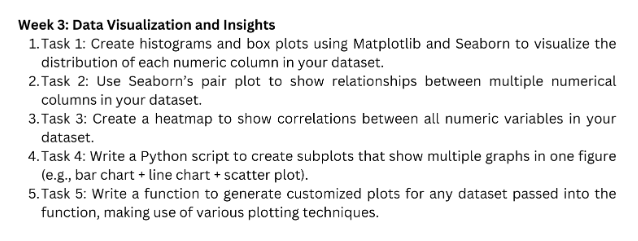

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("Datasets/House Price Prediction/Housing.csv")

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
for col in df.columns:
    print(f"{col} : {df[col].dtype}")

price : int64
area : int64
bedrooms : int64
bathrooms : int64
stories : int64
mainroad : object
guestroom : object
basement : object
hotwaterheating : object
airconditioning : object
parking : int64
prefarea : object
furnishingstatus : object


## Task-1: Histogram and Box plots using matplotlib and seaborn

- Concept: A histogram shows the distribution of numerical data by dividing it into bins and plotting the frequency of data points in each bin.
- Use Case: It helps to understand skewness, outliers, and the spread of the data.


histograms using matplotlib are pretty simple, here are the steps:
- specify the size of the figure using plt.figure(figsize=(x, y)). x is the length and y is the width btw
- then specify that the figure is a histogram using plt.hist(data, bins, color, alpha, edgecolor). the data, bins, color, and edgecolor parameters are quite self-explanatory, although the **number of bins** can be debated, here is a general rule about that
- **The number of bins should balance detail:** too few bins, and you lose insights; too many bins, and it becomes noisy. A good rule of thumb is to start with sqrt(n) bins, where n is the number of data points.
- the alpha parameter simply controls the transparency of the bars (bins). like, the intensity of the color
- after that, we can specify title using plt.title and the x axis and y axis labels using plt.xlabel and plt.ylabel respectively. we can also turn on a grid option using plt.grid, we write x or y or both for the grid option. alpha and linestyle can also be used

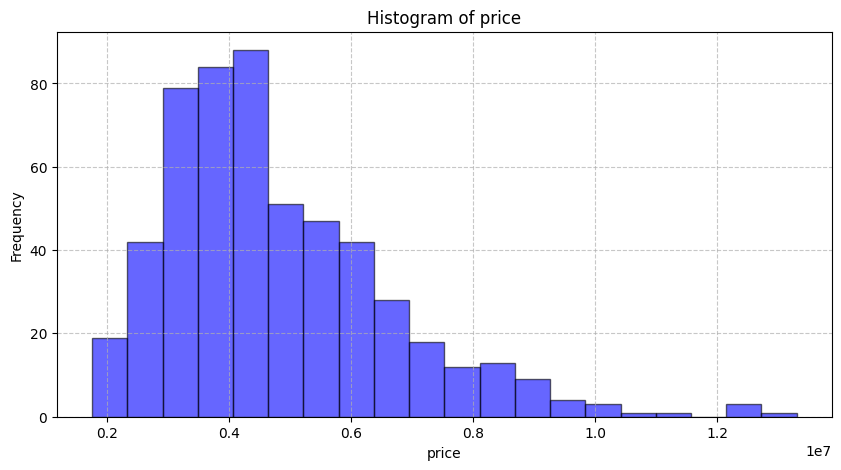

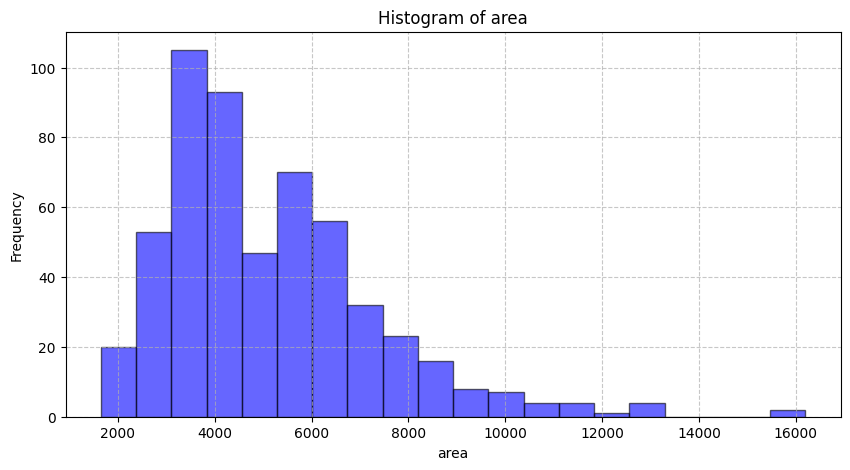

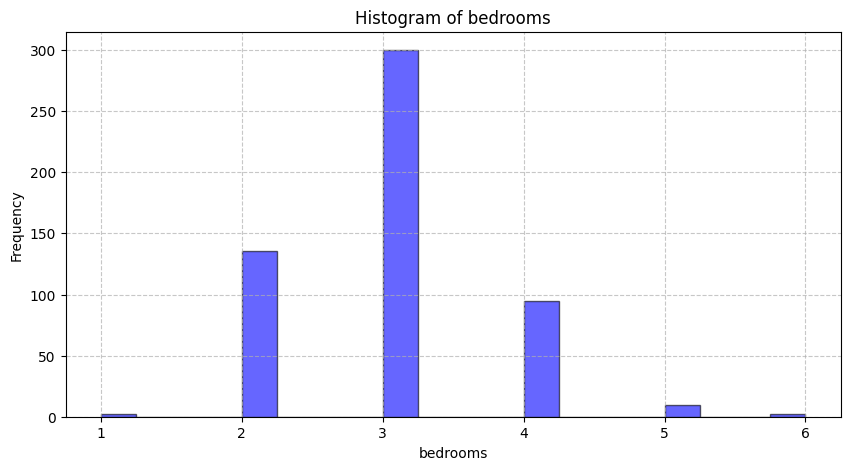

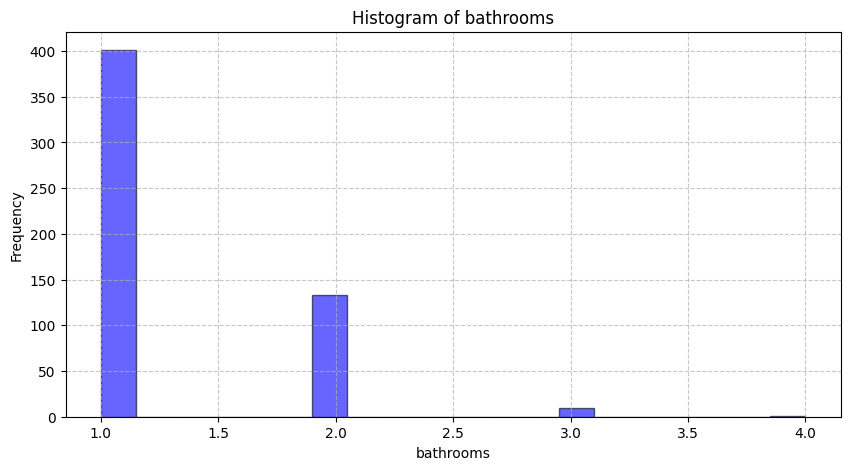

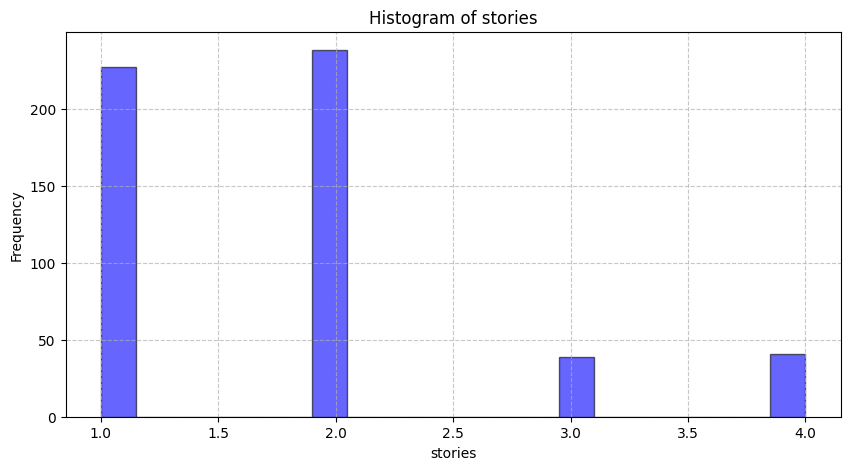

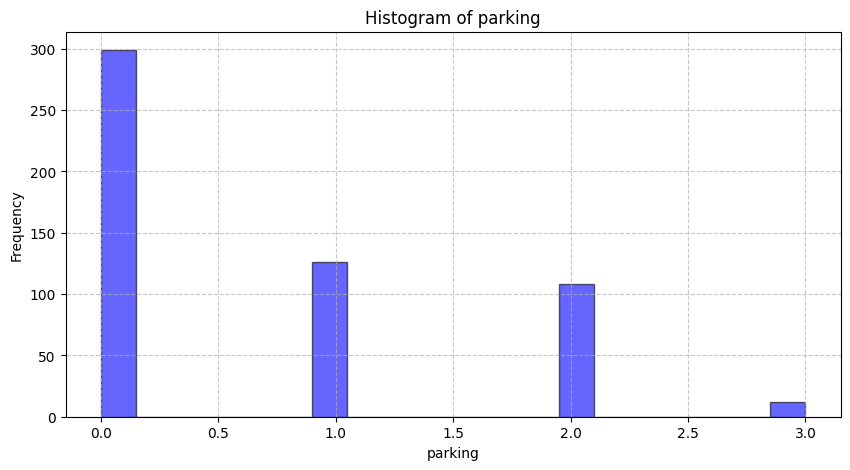

In [31]:
# Plot histogram for each numerical feature
numerical_features = df.select_dtypes(include=['number'])

for column in numerical_features.columns:
    plt.figure(figsize=(10, 5))     
    plt.hist(df[column], bins=20, color='blue', alpha=0.6, edgecolor='black') 
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='both', linestyle='--', alpha=0.7)
    plt.show()

- Concept: A box plot shows the summary statistics of a numerical feature, including median, quartiles, and outliers.
- Use Case: Useful for spotting outliers and understanding the spread and skewness of the data.


Making a box plot is almost exactly the same as the histograms
- specify figure size
- specify that the figure is a boxplot using plt.boxplot, the parameters used are just data and the color. we are using seaeborn btw, since we need that for boxplot. to be clear, matplotlib also has a boxplot function but normally the seaborn one is preferred
- then after that we can of course specify the title and the xlabel and the ylabel and the grid

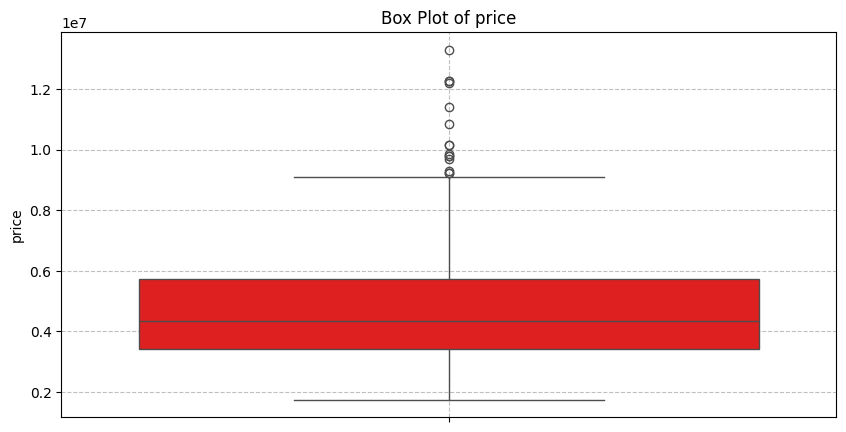

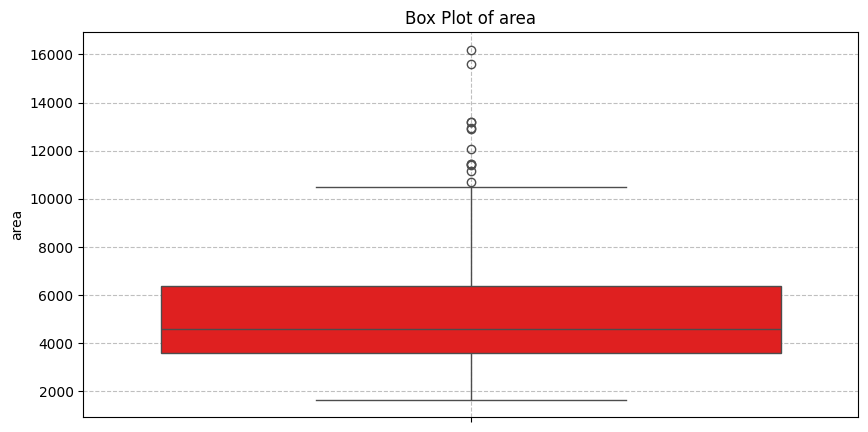

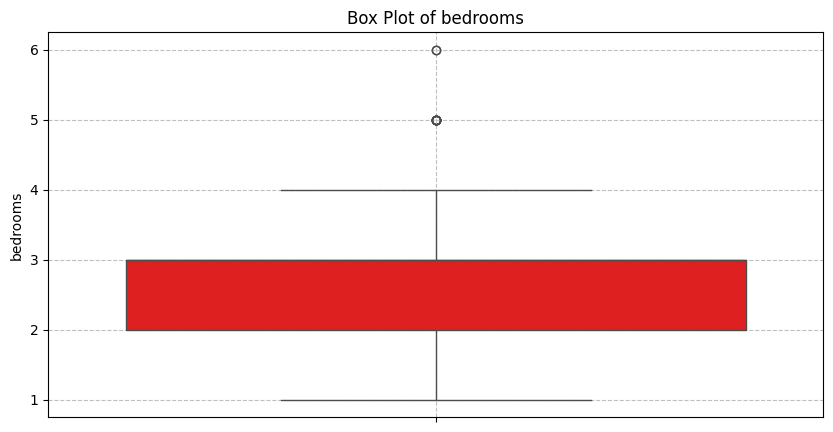

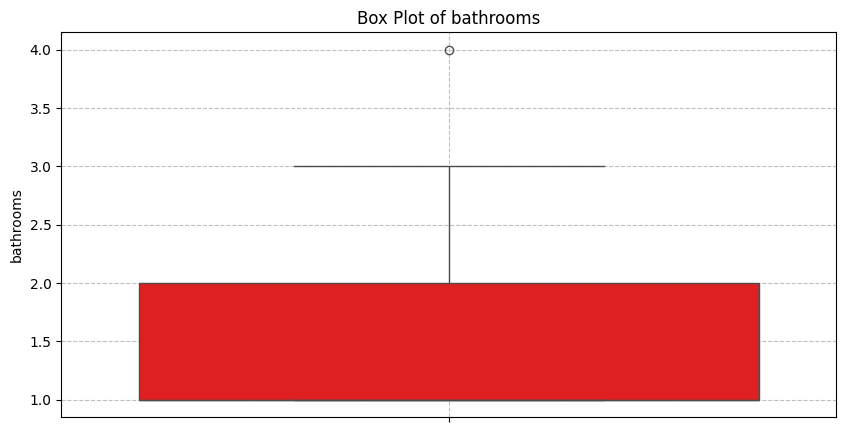

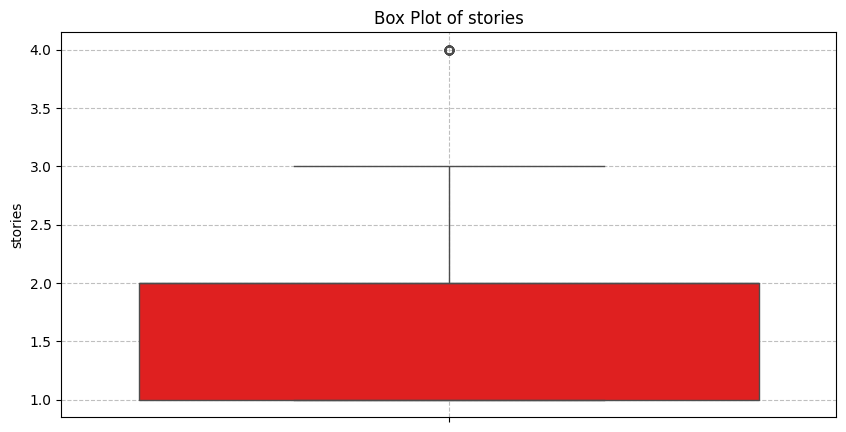

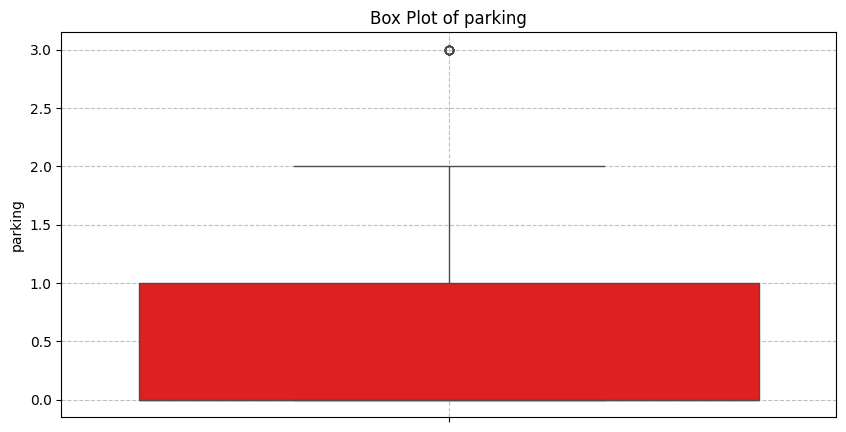

In [32]:
# Plot box plot for each numerical feature
for column in numerical_features.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(y=df[column], color='red')
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.grid(axis='both', linestyle='--', alpha=0.8)
    plt.show()

## Task-2: Using Seaborn's pair plot to show relationships



- Concept: A pair plot generates scatter plots for all pairs of numerical columns, along with histograms along the diagonal for individual feature distributions.
- Use Case: It helps to understand the relationships between features and detect any potential correlations.


**Insights from Pair Plots:**

- You can identify linear relationships between features.
- Spot clusters or patterns in data that might suggest correlations or different distributions.
- Detect multicollinearity, which can indicate redundant features.


### A pair plot is a way to visualize relationships between all numerical features in a dataset by using scatter plots and histograms.
### Each cell in the matrix represents a combination of features:
### The diagonal cells show histograms of individual features.
### The off-diagonal cells are scatter plots showing relationships between features.


**How to Interpret a Pair Plot?**
- Diagonal Cells: Show distribution of individual features. For example, the histograms along the diagonal tell you about the spread of each feature.
- Off-Diagonal Cells: Show relationships:
- A positive relationship between two features results in an upward trend (as one increases, so does the other).
- A negative relationship shows a downward trend.
- If you see a cluster of points in the scatter plot forming a line, it means the features are correlated


**.corr is a method that is used for find the correlation matrix for a dataframe. It shows the pairwise correlation of all numerical features in your dataset.**
- Correlation measures the strength and direction of a linear relationship between two features.
- Correlation coefficients range from -1 to 1.
- +1: Perfect positive correlation (both variables move in the same direction).
- -1: Perfect negative correlation (one variable increases while the other decreases).
- 0: No correlation (no linear relationship).

<br/>
<br/>
<br/>

- annot parameter is just to enable annotation inside that cell
- cmap is the colormap, which is a color pallete ranging from blue to red. 
- Blue usually represents negative correlations.
- Red represents positive correlations.
- White or lighter colors represent values closer to 0 (weak or no correlation).
- linewidths=0.5:
- linewidths adds space between cells to make them more distinguishable.
- 0.5 means a line width of 0.5 units between cells
- 

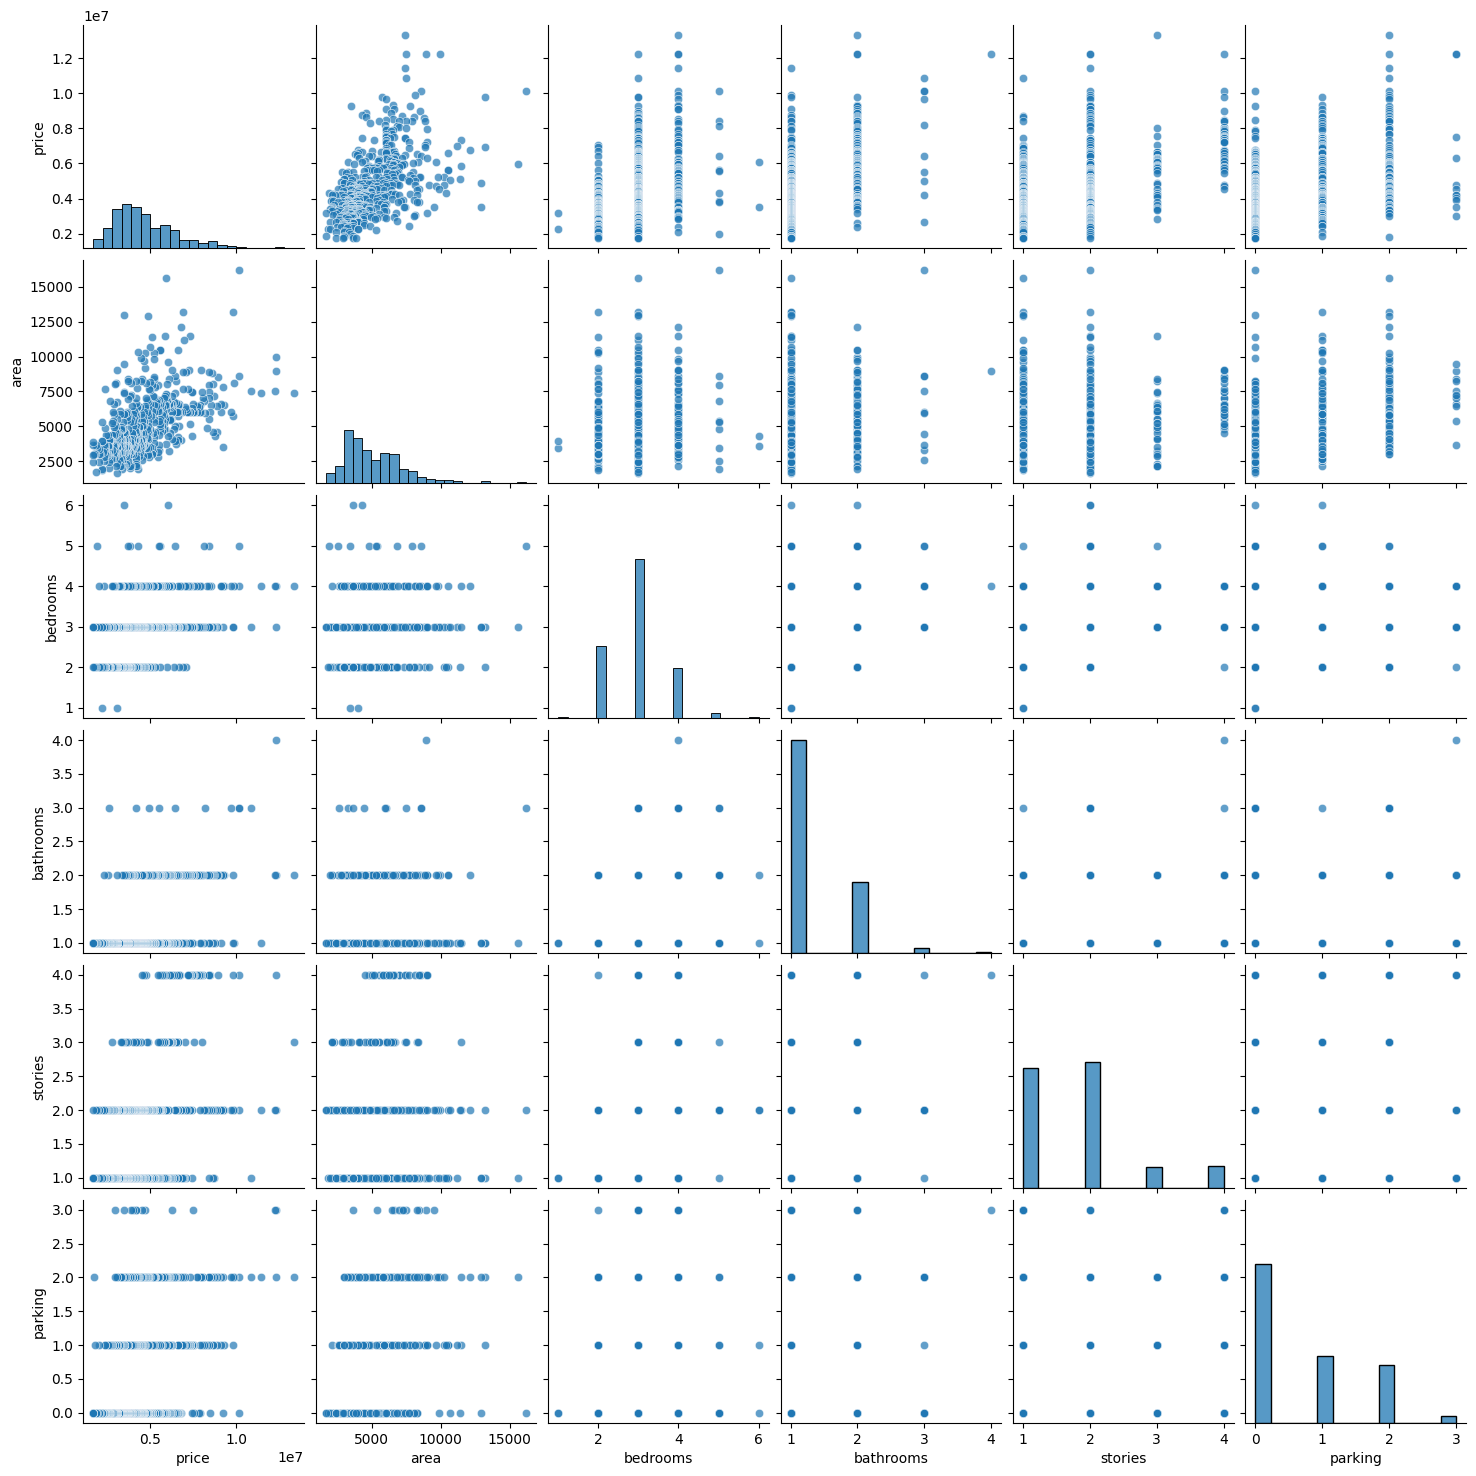

In [33]:
# Create pair plot using Seaborn
sns.pairplot(numerical_features, diag_kind='hist', plot_kws={'alpha': 0.7})
plt.show()


## Task-3: Heatmap for correlations

- Concept: The correlation matrix shows correlation coefficients between pairs of numerical features. A heatmap visualizes this matrix to easily spot high or low correlations.
- Use Case: Understanding which features are highly correlated is important in feature selection and in avoiding multicollinearity.

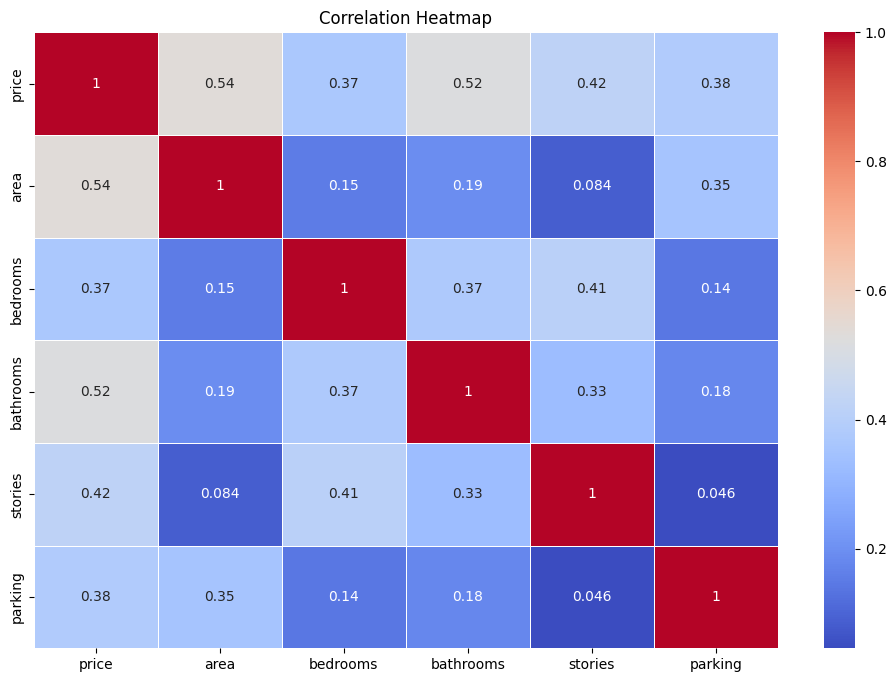

In [34]:
# Calculate correlation matrix
correlation_matrix = numerical_features.corr()

# Plot heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


## Task-4: Creating Subplots with multiple graphs


- Bar Chart for the number of bedrooms.
- Line Chart for the house prices.
- Scatter Plot for area vs. price.

- plt.subplots(3, 1): This creates 3 subplots arranged in 1 column.
- figsize: Defines the size of the entire figure.


- Each graph is plotted in a different subplot (axs[0], axs[1], axs[2]). This makes it easy to compare different visualizations of your dataset side-by-side.

- Where Is This Useful?
- Imagine you’re presenting your findings in a meeting. Instead of flipping through multiple charts, you have them all in one place for easy comparison.
- Helps in seeing combined trends and understanding relationships.

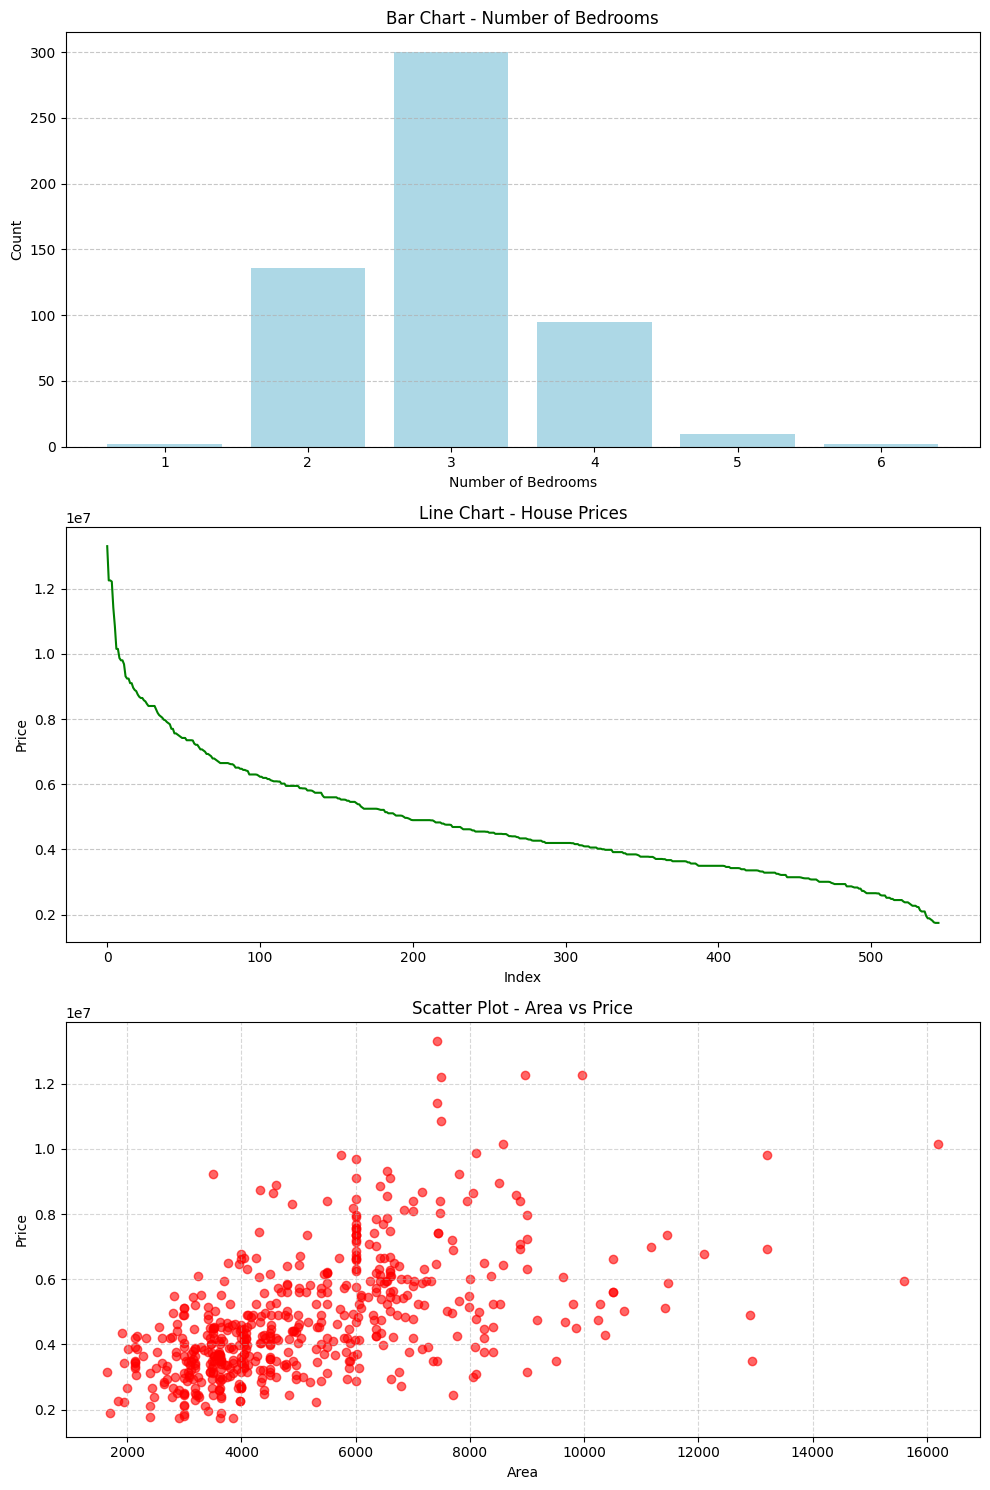

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load sample dataset
df = pd.read_csv("Datasets/House Price Prediction/Housing.csv")

# Creating a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# 1. Bar Chart - Number of Bedrooms
axs[0].bar(df['bedrooms'].value_counts().index, df['bedrooms'].value_counts().values, color='lightblue')
axs[0].set_title('Bar Chart - Number of Bedrooms')
axs[0].set_xlabel('Number of Bedrooms')
axs[0].set_ylabel('Count')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# 2. Line Chart - House Prices
axs[1].plot(df.index, df['price'], color='green')
axs[1].set_title('Line Chart - House Prices')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Price')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# 3. Scatter Plot - Area vs Price
axs[2].scatter(df['area'], df['price'], color='red', alpha=0.6)
axs[2].set_title('Scatter Plot - Area vs Price')
axs[2].set_xlabel('Area')
axs[2].set_ylabel('Price')
axs[2].grid(axis='both', linestyle='--', alpha=0.5)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## Task 5: Creating a Custom Plotting Function

- We want to create a function that will take any dataset and generate customized plots using different plotting techniques.
- This function should be flexible so that you can pass different datasets and specify the kind of plots you want.





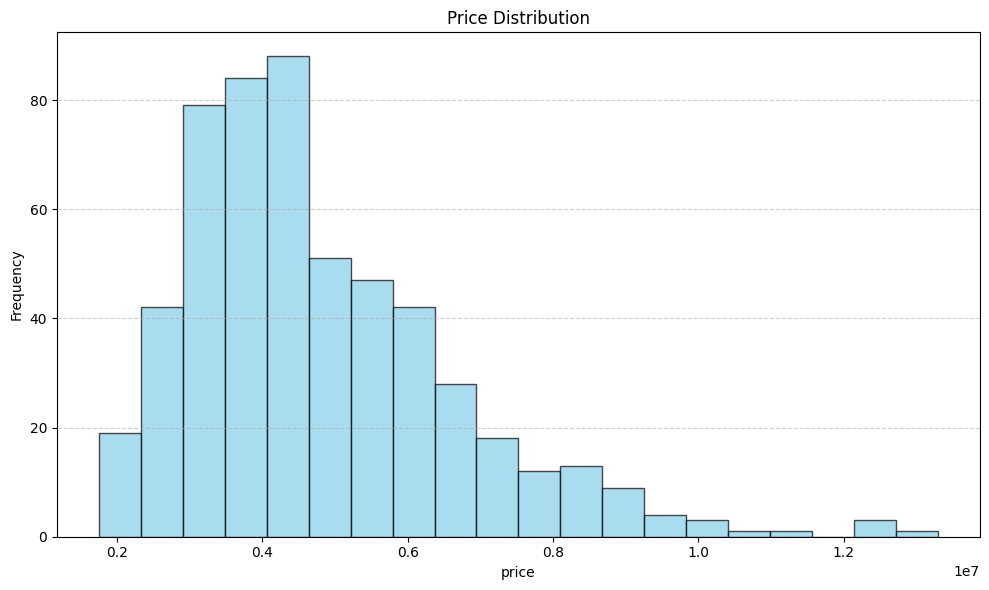

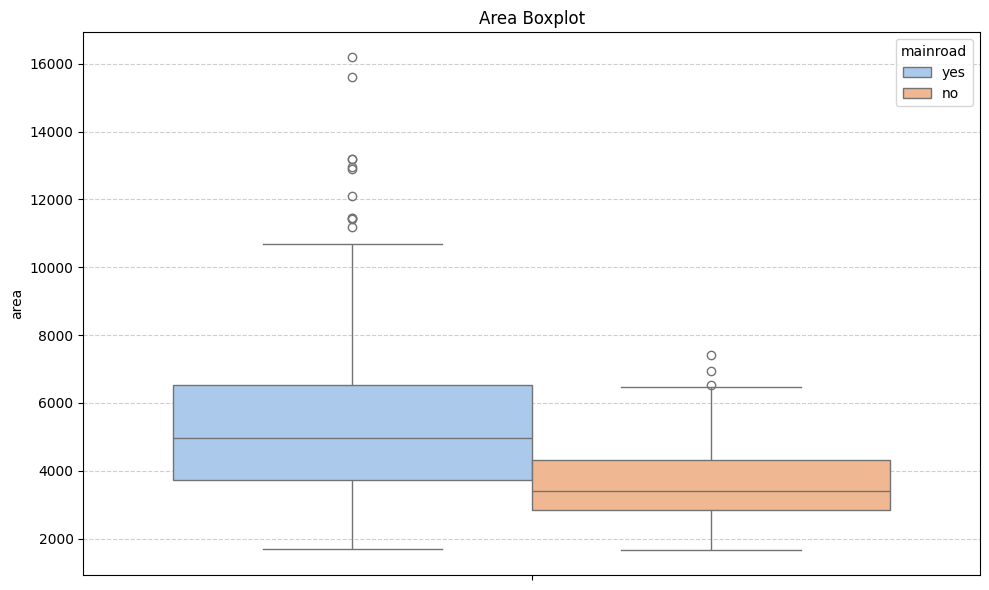

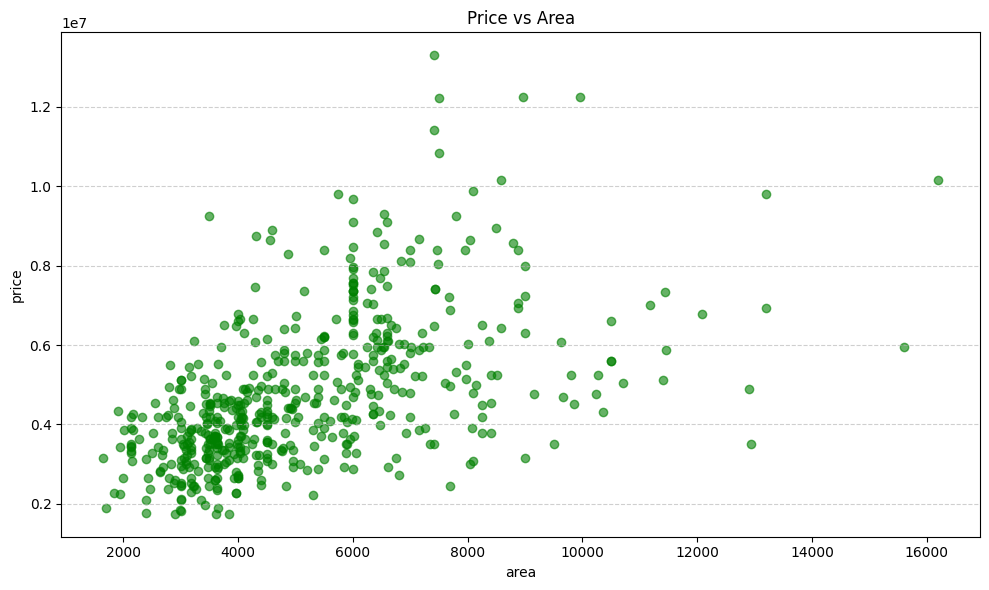

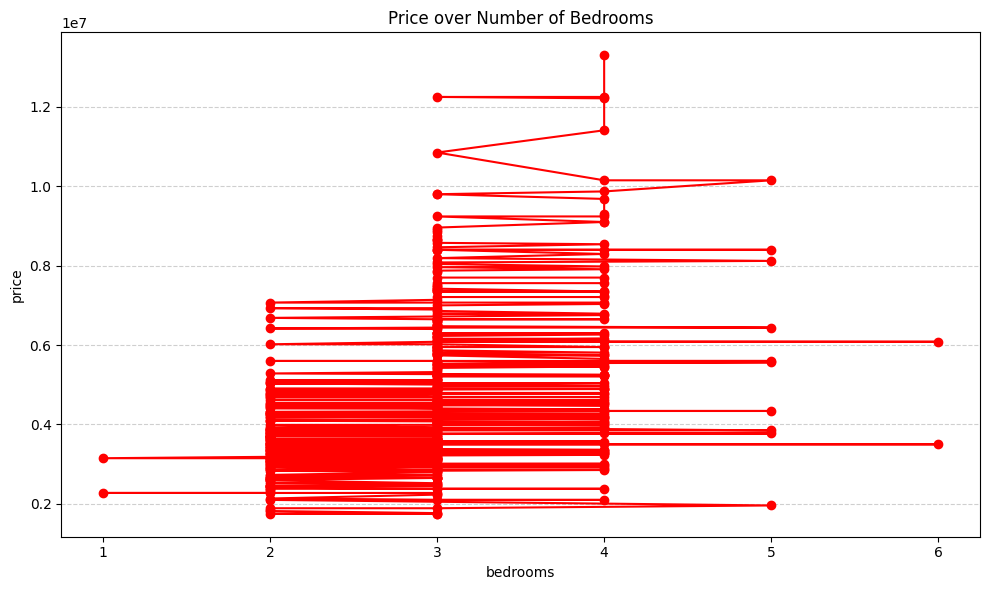

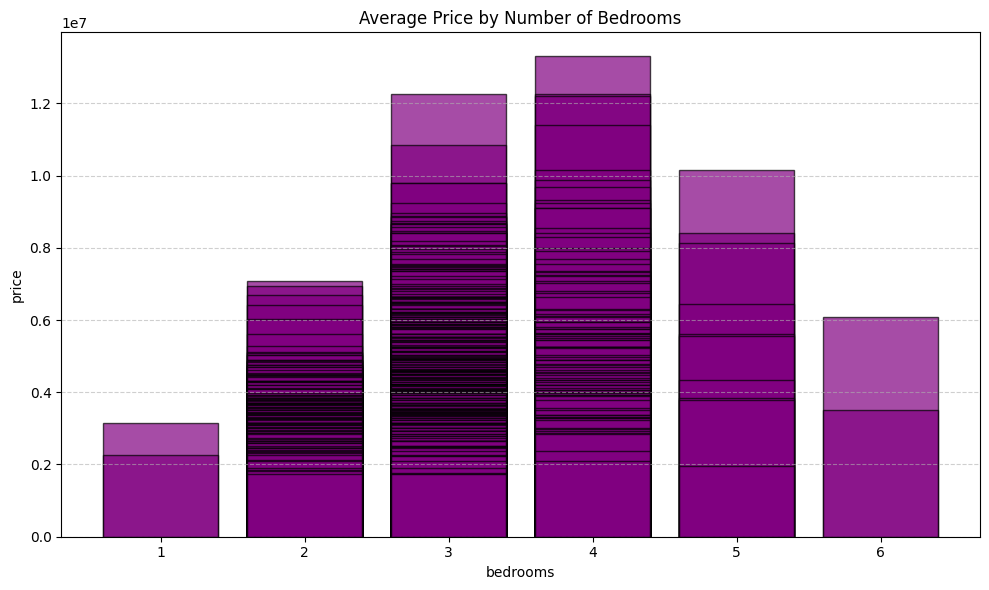

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def custom_plot(df, plot_type, x_col=None, y_col=None, hue=None, title=None):
    plt.figure(figsize=(10, 6))

    # Histogram
    if plot_type == 'histogram':
        if x_col is None:
            print("Please provide a column for the histogram.")
            return
        plt.hist(df[x_col], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        plt.xlabel(x_col)
        plt.ylabel('Frequency')
        plt.title(title if title else f'Histogram of {x_col}')

    # Boxplot
    elif plot_type == 'boxplot':
        if y_col is None:
            print("Please provide a column for the boxplot.")
            return
        sns.boxplot(y=df[y_col], hue=hue, palette='pastel')
        plt.ylabel(y_col)
        plt.title(title if title else f'Box Plot of {y_col}')

    # Scatter Plot
    elif plot_type == 'scatter':
        if x_col is None or y_col is None:
            print("Please provide both x and y columns for the scatter plot.")
            return
        plt.scatter(df[x_col], df[y_col], color='green', alpha=0.6)
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(title if title else f'Scatter Plot of {x_col} vs {y_col}')

    # Line Plot
    elif plot_type == 'line':
        if x_col is None or y_col is None:
            print("Please provide both x and y columns for the line plot.")
            return
        plt.plot(df[x_col], df[y_col], color='red', linestyle='-', marker='o')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(title if title else f'Line Plot of {y_col} over {x_col}')

    # Bar Chart
    elif plot_type == 'bar':
        if x_col is None or y_col is None:
            print("Please provide both x and y columns for the bar chart.")
            return
        plt.bar(df[x_col], df[y_col], color='purple', alpha=0.7, edgecolor='black')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.title(title if title else f'Bar Chart of {y_col} by {x_col}')

    else:
        print("Invalid plot type specified. Available types: histogram, boxplot, scatter, line, bar.")
        return

    # Show plot
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Example usage with Housing dataset
df = pd.read_csv("Datasets/House Price Prediction/Housing.csv")

# Generate different plots using the custom function
custom_plot(df, plot_type='histogram', x_col='price', title='Price Distribution')
custom_plot(df, plot_type='boxplot', y_col='area', title='Area Boxplot', hue=df.mainroad)
custom_plot(df, plot_type='scatter', x_col='area', y_col='price', title='Price vs Area')
custom_plot(df, plot_type='line', x_col='bedrooms', y_col='price', title='Price over Number of Bedrooms')
custom_plot(df, plot_type='bar', x_col='bedrooms', y_col='price', title='Average Price by Number of Bedrooms')
